In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# Plan du notebook  
1 import des donnés  

2 étude autour du chiffre d'affaire  
* 2.1 chiffre d'affaire annuel  
* 2.2 chiffre d'affaire par catégorie  
* 2.3 évolution du chiffre d'affaire  
  * 2.3.1 chiffre d'affaire mensuel
  * 2.3.2 moyenne du chiffre d'affaire mensuel
  * 2.3.3 évolution du panier

3 étude autour des prix des livres   

4 étude en fonction de l'age des client  
* 4.1 catégorie d'achat en fonction de l'âge
* 4.2 valeur du panier en fonction de l'âge
* 4.3 valeur moyenne des achats par tranche d'âge

5 obersvation des tops et flops  
* 5.1 observation des meilleurs clients
* 5.2 observation des meilleurs produits
* 5.3 observation des produits les moins vendus

6 courbe de Lorenz  

7 analyse plus ciblé des clients: réponse aux demande de julie  
* 7.1 étude des ventes en fonction du genre des clients
* 7.2 étude des ventes en fonction des classes d'âge
  * 7.2.1 nombre de client par catégorie d'âge
  * 7.2.2 lien entre l'âge et le montant total d'achat
  * 7.2.3 lien entre l'age et la fréquence d'achat
  * 7.2.4 lien entre l'âge et la taille du panier moyen
  
8 durée des sessions et classe d'âge  
* 8.1 classes d'âge restant le plus longtemps lors d'une session
* 8.2 étude des corrélations durée et fréquence/chiffre d'affaire par session

9 tests statistiques
* 9.1 observations de la relation entre age et la catégorie
  * 9.1.1 ANOVA
  * 9.1.2 test de shapiro sur les résidus
  * 9.1.3 confirmation des résultats par test chi 2
* 9.2 observations de la relation entre age et chiffre d'affaire session
  * 9.2.1 vérification de la normalité de la distribution pour déterminer le test à réaliser
  * 9.2.2 test de Spearman
* 9.3 Test de Chi 2 sur la categ achat et les sex

# 1 import des données

In [2]:
# récupération du df des exports regroupés
df_complet = pd.read_csv("df_complet.csv")
df_complet

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37,31-40
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,37,31-40
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,37,31-40
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,37,31-40
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,37,31-40
...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,22,18-30
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,63,61-70
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,63,61-70
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,31,31-40


In [3]:
# changement format de la colonne date
df_complet["date"] = pd.to_datetime(df_complet["date"])

In [4]:
# vérification que le df est complet et au bon format
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
 8   age         679332 non-null  int64         
 9   classe_age  679332 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 51.8+ MB


In [5]:
# import du df créé
df_sess_compl = pd.read_csv("df_sess_compl.csv")
df_sess_compl

,session_id,client_id,id_prod,age,classe_age,sex,categ,debut_sess,fin_sess,duree,fréquence,CA_sess
0,s_211425,c_103,0_1518,37,31-40,f,0.0,2022-05-20 13:21:10.122134,2022-05-20 13:21:29.043970,0.300000,2,21.17
1,s_64849,c_103,0_1518,37,31-40,f,0.0,2021-07-20 13:21:10.122134,2021-07-20 13:21:29.043970,0.300000,2,21.17
2,s_255965,c_103,0_1518,37,31-40,f,0.0,2022-08-20 13:21:10.122134,2022-08-20 13:21:29.043970,0.300000,2,21.17
3,s_225411,c_103,0_1418,37,31-40,f,0.0,2022-06-18 01:26:20.939798,2022-06-18 01:49:37.823274,23.266667,3,38.55
4,s_77214,c_103,0_1418,37,31-40,f,0.0,2021-08-18 01:26:20.939798,2021-08-18 01:49:37.823274,23.266667,3,38.55
...,...,...,...,...,...,...,...,...,...,...,...,...
342310,s_65994,c_4391,2_147,22,18-30,f,2.0,2021-07-23 07:01:38.963669,2021-07-23 07:01:38.963669,0.000000,1,181.99
342311,s_184472,c_1232,0_142,63,61-70,f,0.0,2022-03-25 18:07:25.880052,2022-03-25 18:07:25.880052,0.000000,1,19.85
342312,s_95415,c_1232,0_142,63,61-70,f,0.0,2021-09-25 18:07:25.880052,2021-09-25 18:07:25.880052,0.000000,1,19.85
342313,s_4605,c_7534,2_205,31,31-40,m,2.0,2021-03-11 00:11:32.016264,2021-03-11 00:11:32.016264,0.000000,1,100.99


# 2 étude autour du chiffre d'affaire

## 2.1 chiffre d'affaire annuel

In [6]:
# chiffre d'affaire par année
df_CA_an = df_complet.groupby(df_complet["date"].dt.year.rename("année"))["price"].sum().reset_index()
df_CA_an

,année,price
0,2021,4771724.40
1,2022,6109920.21
2,2023,974364.79


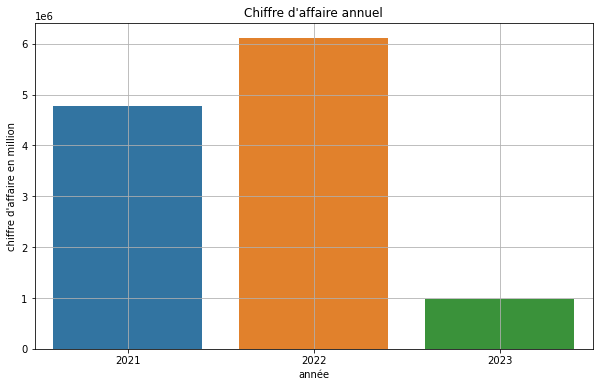

In [7]:
# visualisation du CA/année
plt.figure(figsize=(10,6))
sns.barplot(data= df_CA_an, x="année", y="price")
plt.title("Chiffre d'affaire annuel")
plt.xlabel("année")
plt.ylabel("chiffre d'affaire en million")
plt.savefig("chiffre d'affaire par an.png", dpi=300, bbox_inches="tight")
plt.grid()
plt.show()

Le chiffre d'affaire est en évolution  
Il est à noter que la chiffre d'affaire 2021 ne contient pas les chiffres d'affaire de janvier et février

## 2.2 chiffre d'affaire par catégorie

In [8]:
# CA par catégorie de produit
df_par_categ = df_complet.groupby(df_complet["categ"])["price"].sum().reset_index()
df_par_categ

,categ,price
0,0.0,4422011.69
1,1.0,4653722.69
2,2.0,2780275.02


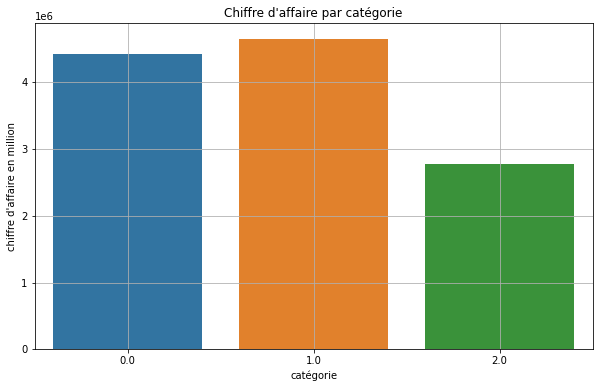

In [9]:
# visualisation du CA par catégorie
plt.figure(figsize=(10,6))
sns.barplot(data= df_par_categ, x="categ", y="price")
plt.title("Chiffre d'affaire par catégorie")
plt.xlabel("catégorie")
plt.ylabel("chiffre d'affaire en million")
plt.grid()
plt.show()

In [10]:
# chiffre d'affaire par catégorie par an
df_categ_an = df_complet.groupby([df_complet["date"].dt.year.rename("année"), df_complet["categ"]])["price"].sum().reset_index()
df_categ_an

,année,categ,price
0,2021,0.0,1883918.29
1,2021,1.0,1777995.85
2,2021,2.0,1109810.26
3,2022,0.0,2194208.86
4,2022,1.0,2485275.19
5,2022,2.0,1430436.16
6,2023,0.0,343884.54
7,2023,1.0,390451.65
8,2023,2.0,240028.60


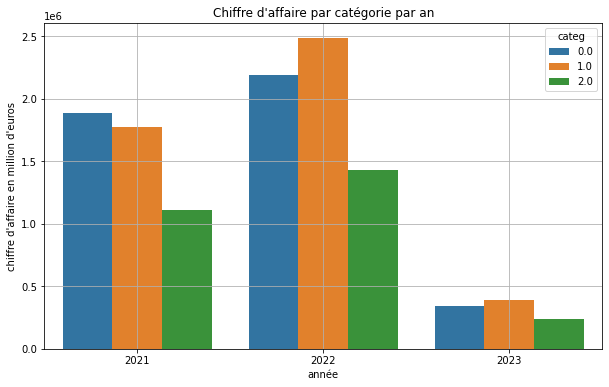

In [11]:
# visualisation de la répartition du CA/an par catégorie
plt.figure(figsize=(10,6))
sns.barplot(data=df_categ_an, x="année", y="price", hue="categ")
plt.title("Chiffre d'affaire par catégorie par an")
plt.xlabel("année")
plt.ylabel("chiffre d'affaire en million d'euros")
plt.savefig("chiffre d'affaire par an et par catégorie.png", dpi=300, bbox_inches="tight")
plt.grid()
plt.show()

## 2.3 évolution du chiffre d'affaire

### 2.3.1 chiffre d'affaire mensuel

In [12]:
# chiffre d'affaire par mois
df_CA_mois=df_complet.groupby([df_complet["date"].dt.year.rename("année"), df_complet["date"].dt.month.rename("mois")])["price"].sum()
df_CA_mois

année  mois
2021   3       482533.49
       4       476253.78
       5       493026.03
       6       484160.80
       7       482876.68
       8       482377.67
       9       507364.52
       10      320870.98
       11      516270.93
       12      525989.52
2022   1       525390.59
       2       535685.02
       3       515570.05
       4       493143.42
       5       517297.72
       6       496088.36
       7       510906.96
       8       506549.83
       9       494207.41
       10      508020.97
       11      496778.46
       12      510281.42
2023   1       517612.79
       2       456752.00
Name: price, dtype: float64

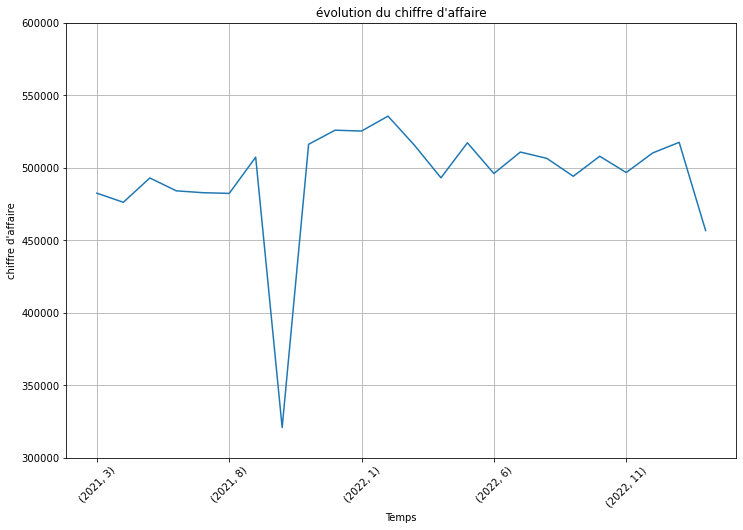

In [13]:
# visualisation de l'évolution du CA/mois
df_CA_mois.plot.line(figsize=(12,8))
plt.xlabel("Temps")
plt.xticks(rotation=45)
plt.ylabel("chiffre d'affaire")
plt.title("évolution du chiffre d'affaire")
plt.ylim(300000,600000)
plt.savefig("évolution du chiffre d'affaire.png", dpi=300, bbox_inches="tight")
plt.grid()
plt.show()

Le graphique montre une baisse du chiffre d'affaire en 10/2021: peut être le signe de ventes non comptabilisées

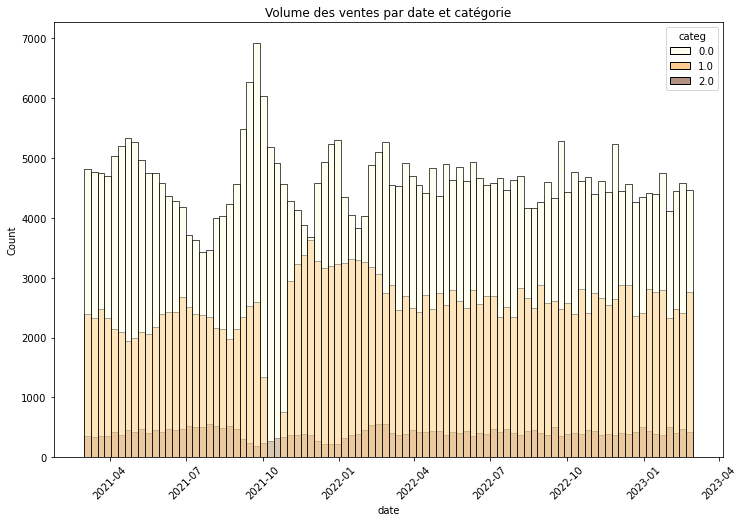

In [14]:
# visualisation du volume des ventes mensuelles pour déterminer le problème apparut sur 10/2021
plt.figure(figsize=(12,8))
sns.histplot(data=df_complet, x="date", hue="categ", palette="YlOrBr")
plt.xticks(rotation=45)
plt.title("Volume des ventes par date et catégorie")
plt.savefig("Volume des ventes par date et categ.png", dpi=300, bbox_inches="tight")
plt.show()

En regardant le volume des ventes par catégorie nous pouvons voir que ce sont les vente des produits de categorie 1 qui n'ont pas été enregistré

### 2.3.2 moyenne du chiffre d'affaire mensuel

In [15]:
# moyenne chiffre d'affaire par mois
df_moyCA_mois=df_complet.groupby([df_complet["date"].dt.year.rename("année"), df_complet["date"].dt.month.rename("mois")])["price"].mean()
df_moyCA_mois

année  mois
2021   3       16.865903
       4       16.735910
       5       17.425725
       6       18.027360
       7       19.516477
       8       18.799551
       9       15.224285
       10      14.851013
       11      18.229262
       12      16.202240
2022   1       17.902092
       2       18.094410
       3       17.355170
       4       17.857163
       5       17.248432
       6       17.399893
       7       17.812808
       8       17.741308
       9       17.453908
       10      17.533684
       11      17.385681
       12      17.826425
2023   1       17.882632
       2       17.875391
Name: price, dtype: float64

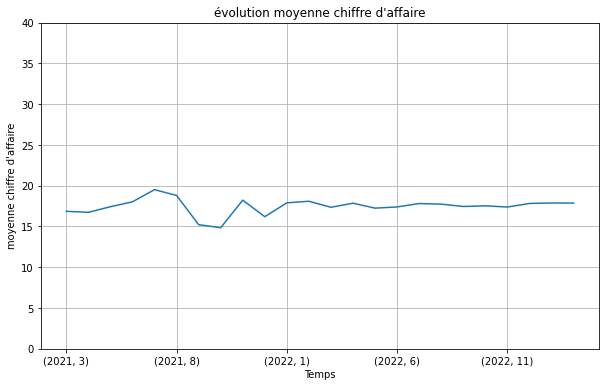

In [16]:
# visualisation évolution de la moyenne CA/mois
df_moyCA_mois.plot.line(figsize=(10,6))
plt.title("évolution moyenne chiffre d'affaire")
plt.xlabel("Temps")
plt.ylabel("moyenne chiffre d'affaire")
plt.ylim(0,40)
plt.grid()
plt.show()

La moyenne du chiffre d'affaire par mois est plutot stable

### 2.3.3 évolution du panier

In [17]:
# chiffre d'affaire par mois regroupé par session
df_CA_mois_ses =df_complet.groupby([df_complet["date"].dt.year.rename("année"), df_complet["date"].dt.month.rename("mois"), df_complet["session_id"]])["price"].sum().reset_index()
df_CA_mois_ses

,année,mois,session_id,price
0,2021,3,s_1,11.99
1,2021,3,s_10,26.99
2,2021,3,s_100,33.72
3,2021,3,s_1000,39.22
4,2021,3,s_10000,41.49
...,...,...,...,...
342361,2023,2,s_348443,28.54
342362,2023,2,s_348444,21.92
342363,2023,2,s_348445,48.99
342364,2023,2,s_348446,26.99


In [18]:
# calcul pour obtenir la valeur du panier moyen par mois
df_panier_moy_mois = df_CA_mois_ses.groupby([df_complet["date"].dt.year.rename("année"), df_complet["date"].dt.month.rename("mois")])["price"].mean()
df_panier_moy_mois

année  mois
2021   3       34.774861
       4       34.463203
       5       34.402882
       6       35.031312
       7       35.022635
       8       34.834839
       9       34.916724
       10      34.854458
       11      34.845522
       12      34.839629
2022   1       34.712145
       2       34.345555
       3       34.210816
       4       34.780274
       5       34.895519
       6       34.455616
       7       34.579661
       8       34.371608
       9       34.360498
       10      34.337373
       11      34.310218
       12      34.646702
2023   1       34.838542
       2       34.332266
Name: price, dtype: float64

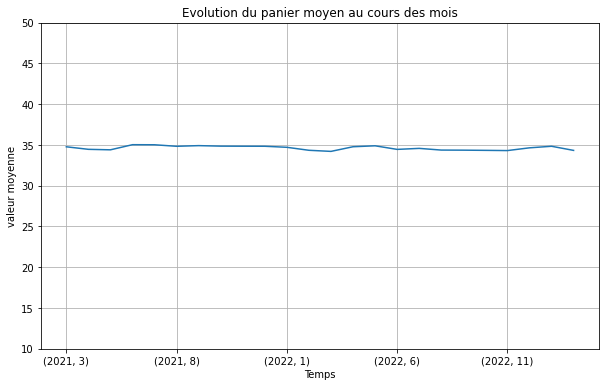

In [19]:
# visualisation de la valeur du panier moyen
df_panier_moy_mois.plot.line(figsize=(10,6))
plt.title("Evolution du panier moyen au cours des mois")
plt.xlabel("Temps")
plt.ylabel("valeur moyenne")
plt.ylim(10,50)
plt.grid()
plt.show()

Le panier moyen mensuel est stable

# 3 étude autour des prix des livres vendus

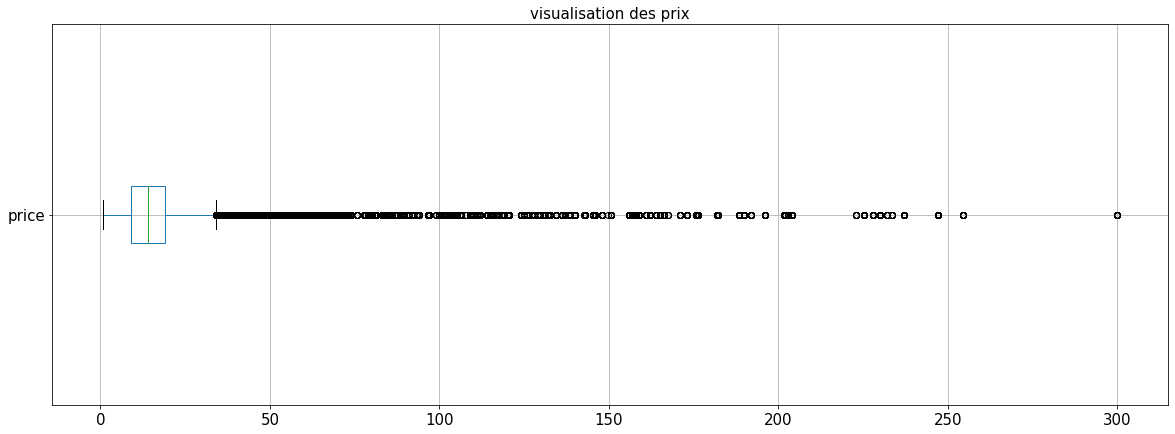

In [20]:
# visualisation de la colonne prix avec l'utilisation d'une boite à moustache
plt.figure(figsize=(20,7))
df_complet.boxplot(column='price', vert=False, fontsize= 15)
plt.title("visualisation des prix", fontsize =15)
plt.show()

Nous pouvons observer des valeurs extrêmes concernant les prix des livre vendus

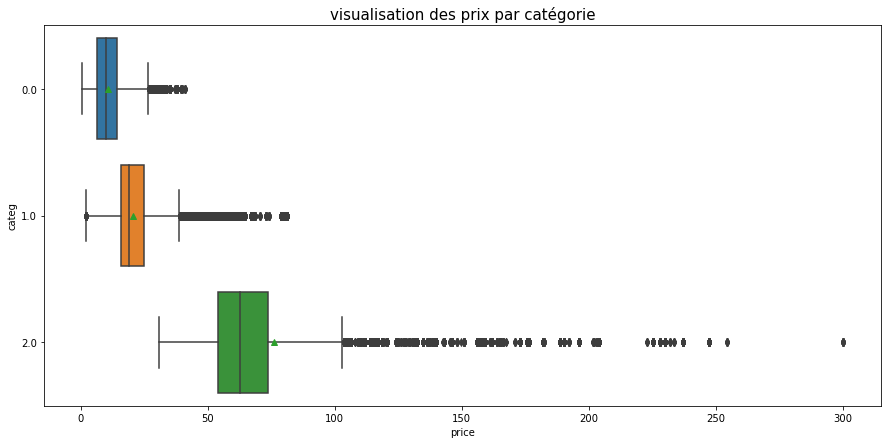

In [21]:
# visualisation des prix en fonction des catégories
plt.figure(figsize=(15,7))
sns.boxplot(data=df_complet, x="price", y="categ", orient="h", showmeans=True)
plt.title("visualisation des prix par catégorie", fontsize =15)
plt.show()

Les livres de la catégorie 0 sont les moins cher et on le moins d'amplitude et valeur extrême concernant les prix  
Les livre de la caégorie 2 sont les plus cher, avec le plus d'amplitude et de valeur extrême

# 4 étude en fonction de l'age des client

## 4.1 catégorie d'achat en fonction de l'âge

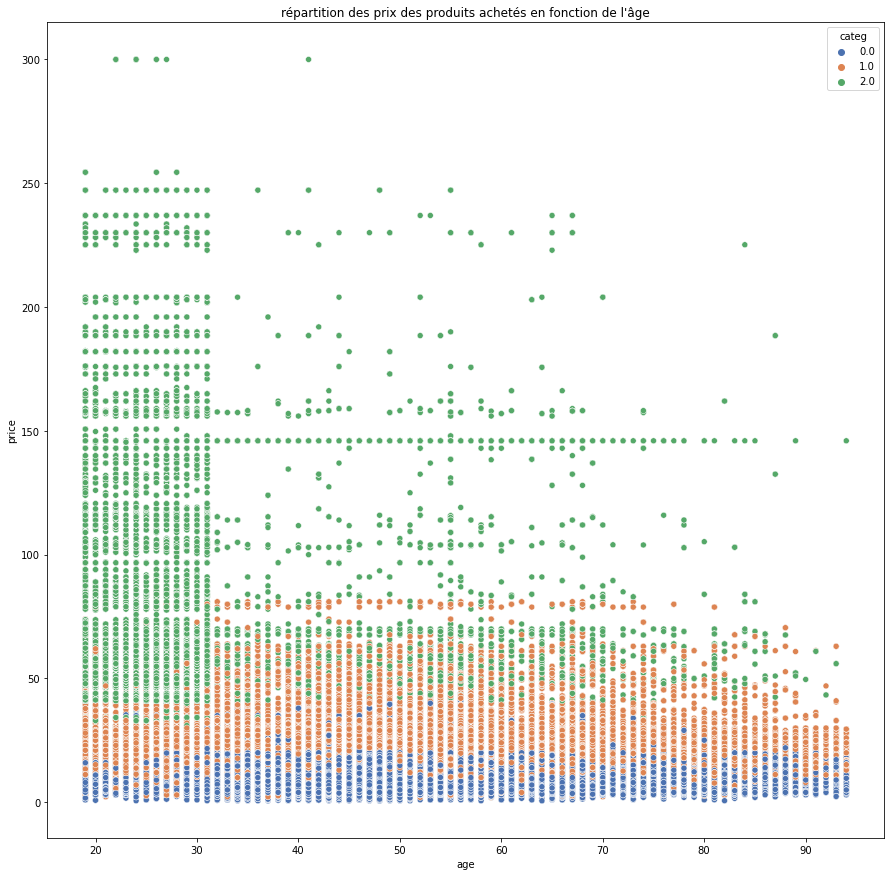

In [22]:
# visualisaion des prix des livres achetés en fonction de l'âge des clients
plt.figure(figsize=(15,15))
sns.scatterplot(data= df_complet, x="age", y="price", hue="categ", palette="deep")
plt.title("répartition des prix des produits achetés en fonction de l'âge")
plt.savefig("répartition prix produits en fontion ages.png", dpi=300, bbox_inches="tight")
plt.show()

Les biens de catégorie 0 et 1 sont achetés par toutes les classes d'âge  
Les biens de catégorie 2 sont majoritairement acheté par les 20-30 ans.

## 4.2 valeur du panier en fonction de l'âge

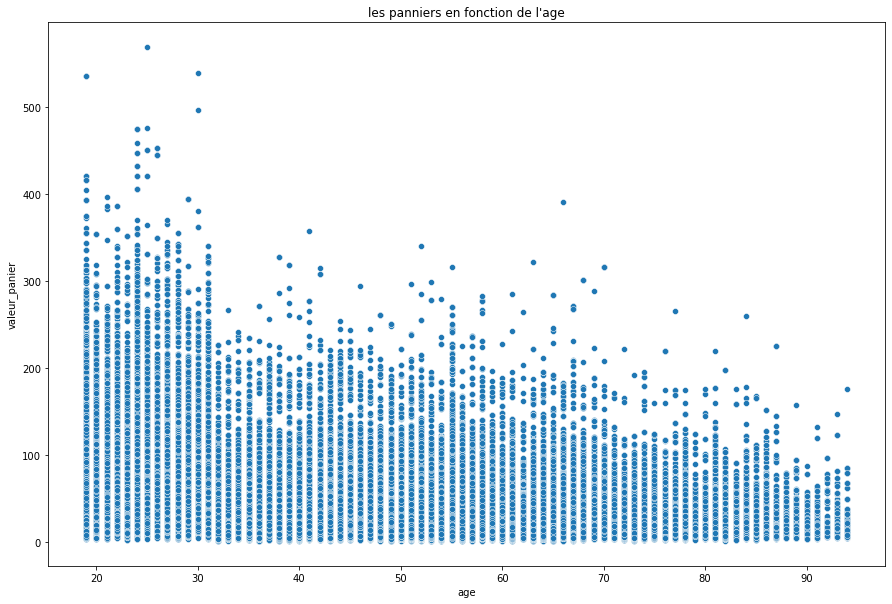

In [23]:
# visualisation des panier en fonction de l'age
plt.figure(figsize=(15,10))
sns.scatterplot(data= df_complet, x=df_complet.groupby(df_complet["session_id"])["age"].mean(), y=df_complet.groupby(df_complet["session_id"])["price"].sum())
plt.ylabel("valeur_panier")
plt.title("les panniers en fonction de l'age")
plt.savefig("valeur panier en fontion ages.png", dpi=300, bbox_inches="tight")
plt.show()

Les moins de 30ans ont des valeurs de panier suppérieur aux autres classes d'âge

## 4.3 valeur moyenne des achats par tranche d'âge

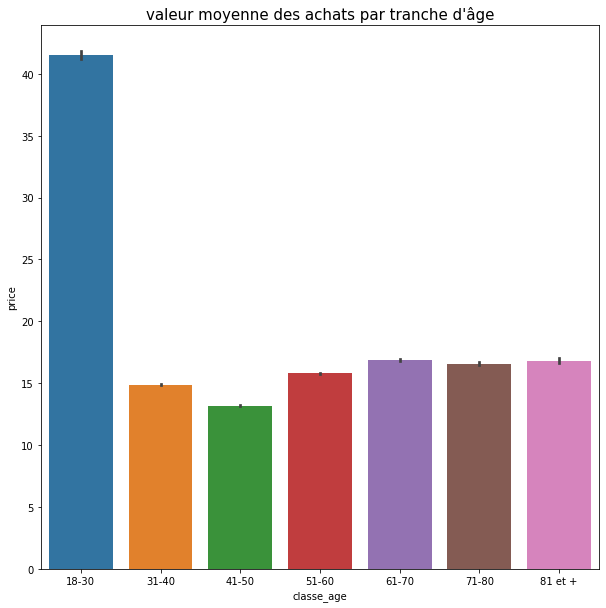

In [24]:
# valeur moyenne des achats par tranche d'âge
plt.figure(figsize=(10,10))
sns.barplot(data=df_complet, x=df_complet["classe_age"].sort_values(), y="price")
plt.title("valeur moyenne des achats par tranche d'âge", fontsize =15)
plt.show()

Le graphique confirme que les 18-30 sont ceux qui achètent le plus et dont la valeur moyenne d'achat est la plus importante

# 5 obersvation des tops et flops

## 5.1 observation des meilleurs clients

In [25]:
# observation des meilleurs clients
df_achat_tt_client =df_complet.groupby(df_complet["client_id"])["price"].sum().sort_values(ascending=False).reset_index().head(10)
df_achat_tt_client

,client_id,price
0,c_1609,324033.35
1,c_4958,289760.34
2,c_6714,153660.84
3,c_3454,113668.89
4,c_3263,5276.87
5,c_1570,5271.62
6,c_2899,5214.05
7,c_2140,5208.82
8,c_7319,5155.77
9,c_8026,5092.90


On observe 4 clients que se détache  
Au vu du chiffre d'affaire associé à ces clients ce sont probablement des professionnels

## 5.2 observation des meilleurs produits

In [26]:
# top 5 des produits les plus vendus depuis mars 2021
df_complet.groupby(df_complet["id_prod"])["price"].value_counts().sort_values(ascending=False).head(5)

id_prod  price
1_369    23.99    2252
1_417    20.99    2189
1_414    23.83    2180
1_498    23.37    2128
1_425    16.99    2096
Name: price, dtype: int64

Le produit le plus vendu depuis mars 2021 est le produit 1_369 vendu 2252 fois

## 5.3 observation des produits les moins vendus

In [27]:
# flop 20 des produits les moins vendus depuis mars 2021
df_complet.groupby(df_complet["id_prod"])["price"].value_counts().sort_values().head(20)

id_prod  price 
0_549    2.99      1
0_2201   20.99     1
2_23     115.99    1
0_1284   1.38      1
0_1683   2.99      1
0_833    2.99      1
2_98     149.74    1
0_1633   24.99     1
0_1601   1.99      1
2_81     86.99     1
0_807    1.99      1
0_541    1.99      1
0_1151   2.99      1
0_886    21.82     1
0_1539   0.99      1
0_1379   2.99      1
0_1728   2.27      1
0_1498   2.48      1
0_88     8.30      2
0_1803   2.99      2
Name: price, dtype: int64

Il est a noter que les produits n'ayant fait l'objet d'aucune vente ont été exclu du dataframe lors de la phase de nettoyage

# 6 courbe de Lorenz

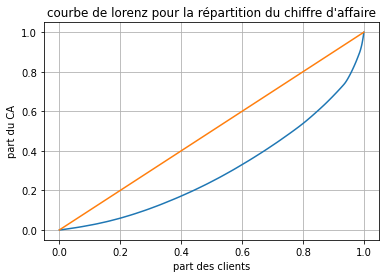

In [28]:
# création de la courbe de Lorenz
ca = df_complet["price"].values
n = len(ca)
lorenz = np.cumsum(np.sort(ca))/ca.sum()
lorenz = np.append([0], lorenz)
axe_x = np.linspace(0-1/n, 1+1/n, n+1)
plt.plot(axe_x, lorenz, drawstyle="steps-post")
plt.title("courbe de lorenz pour la répartition du chiffre d'affaire")
plt.plot([0,1], [0,1])
plt.xlabel("part des clients")
plt.ylabel("part du CA")
plt.grid()
plt.savefig("courbe de Lorenz.png", dpi=300, bbox_inches="tight")
plt.show()

50% des clients ne font qu'environ 25% des achats

In [29]:
# détermination de l'indice de gini
air = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n
print(f"la surface sous la courbe de lorenz est de : {air}")
surface = 0.5-air
gini = surface * 2
print(f"indice de gini : {gini}")

la surface sous la courbe de lorenz est de : 0.30227851243713666
indice de gini : 0.3954429751257267


# 7 analyse plus ciblé des clients: réponse aux demande de julie

## 7.1 étude des ventes en fonction du genre des clients

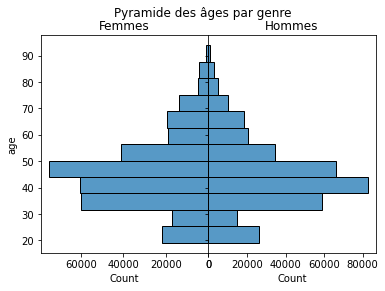

In [30]:
# pyramide des âges en fonction des sexes
fig, axes = plt.subplots(1, 2)
fig.suptitle("Pyramide des âges par genre")
sns.histplot(ax=axes[0], y=df_complet[df_complet["sex"]=="f"]["age"], bins=12)
axes[0].invert_xaxis()
axes[0].set_title("Femmes")
sns.histplot(ax=axes[1], y=df_complet[df_complet["sex"]=="m"]["age"], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel("")
axes[1].set_title("Hommes")
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("pyramide age et genre.png", dpi=300, bbox_inches="tight")
plt.show()

Le volume des ventes est très équilibré entre les 2 sexes

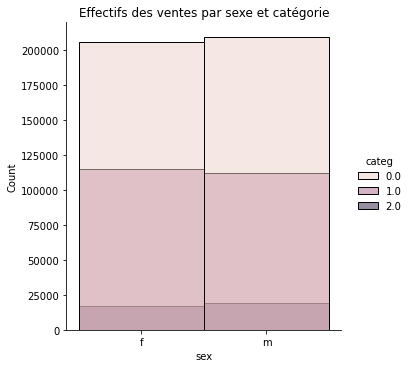

In [31]:
# effectif des vente par sexe et catégorie
sns.displot(data=df_complet, x="sex", hue="categ")
plt.title("Effectifs des ventes par sexe et catégorie")
plt.savefig("effectifs des vente par genre.png", dpi=300, bbox_inches="tight")
plt.show()

La répartition est encore très équilibré, rien de particulier ne ressort du traitement en fonction du sexe des acheteurs

## 7.2 étude des ventes en fonction des classes d'âge

### 7.2.1 nombre de client par catégorie d'âge

In [32]:
# nombre de clients par tranche d'âge
df_effectif = df_sess_compl.groupby("classe_age")["client_id"].count().reset_index()
df_effectif

,classe_age,client_id
0,18-30,40298
1,31-40,70162
2,41-50,96897
3,51-60,68886
4,61-70,39250
5,71-80,18163
6,81 et +,8659


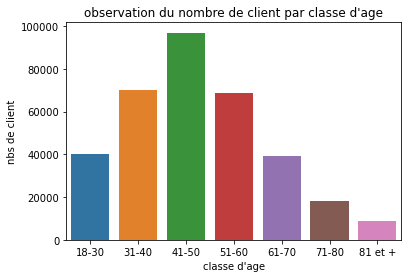

In [33]:
# visualisation du nombre de clients par classe d'age
sns.barplot(data= df_effectif, x="classe_age", y="client_id")
plt.xlabel("classe d'age")
plt.ylabel("nbs de client")
plt.title("observation du nombre de client par classe d'age")
plt.savefig("nbs de client par classe.png", dpi=300, bbox_inches="tight")
plt.show()

La tranche d'age la plus représenté parmi la clientèle sont les 41-50ans, suivit des 31-40 et des 51-60ans

### 7.2.2 lien entre l'âge et le montant total d'achat

In [34]:
df_mtt_tt_achat = df_sess_compl.groupby("classe_age")["CA_sess"].sum().reset_index()
df_mtt_tt_achat

,classe_age,CA_sess
0,18-30,2884715.14
1,31-40,2450876.78
2,41-50,3062102.65
3,51-60,1844167.81
4,61-70,962320.74
5,71-80,436947.38
6,81 et +,214878.90


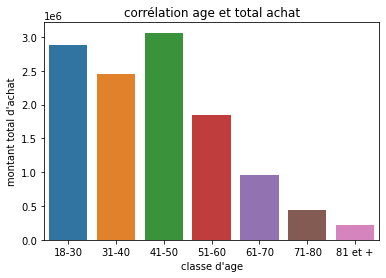

In [35]:
# visualisation de le montant total d'achat
sns.barplot(data= df_mtt_tt_achat, x="classe_age", y="CA_sess")
plt.xlabel("classe d'age")
plt.ylabel("montant total d'achat")
plt.title("corrélation age et total achat")
plt.savefig("age et total achat.png", dpi=300, bbox_inches="tight")
plt.show()

En montant total d'achat c'est la classe des 41-50 ans qui arrive en tête  
suivit de près par les 18-30 qui sont pourtant 2 fois moins nombres 

### 7.2.3 lien entre l'age et la fréquence d'achat

In [36]:
# calcul du nombre de cession par classe d'age
df_fréquence = df_sess_compl.groupby("classe_age")["fréquence"].sum().reset_index()
df_fréquence

,classe_age,fréquence
0,18-30,69488
1,31-40,164626
2,41-50,232176
3,51-60,116778
4,61-70,57117
5,71-80,26374
6,81 et +,12773


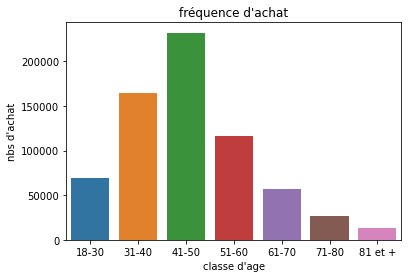

In [37]:
# visualisation de la fréquence d'achat
sns.barplot(data= df_fréquence, x="classe_age", y="fréquence")
plt.xlabel("classe d'age")
plt.ylabel("nbs d'achat")
plt.title("fréquence d'achat")
plt.savefig("age et fréquence d'achat.png", dpi=300, bbox_inches="tight")
plt.show()

En nombre d'achat les 41-50ans sont en tête

### 7.2.4 lien entre l'âge et la taille du panier moyen

In [38]:
df_panier_moy = df_sess_compl.groupby("classe_age")["CA_sess"].mean().reset_index()
df_panier_moy

,classe_age,CA_sess
0,18-30,71.584573
1,31-40,34.931684
2,41-50,31.601625
3,51-60,26.771301
4,61-70,24.517726
5,71-80,24.057005
6,81 et +,24.815672


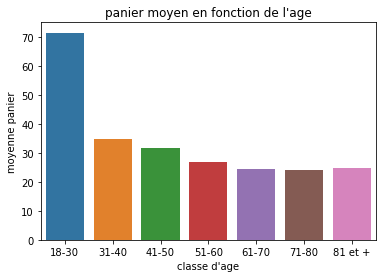

In [39]:
# visualisation moyenne panier
sns.barplot(data= df_panier_moy, x="classe_age", y="CA_sess")
plt.xlabel("classe d'age")
plt.ylabel("moyenne panier")
plt.title("panier moyen en fonction de l'age")
plt.savefig("age et panier moyen.png", dpi=300, bbox_inches="tight")
plt.show()

Le montant du panier moyen est le plus important pour les 18-30

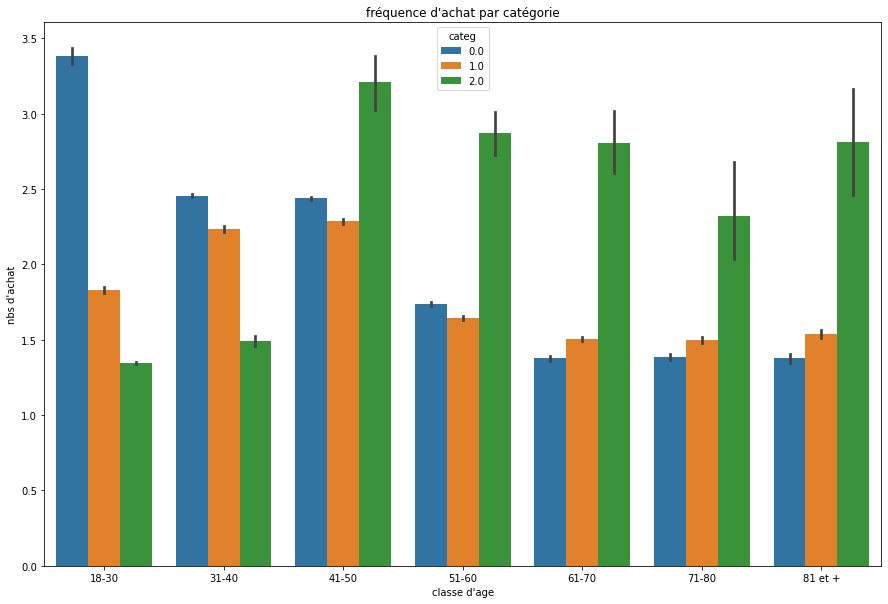

In [40]:
# visualisation nombre d'achat par categorie
plt.figure(figsize=(15,10))
sns.barplot(data= df_sess_compl, x=df_sess_compl["classe_age"].sort_values(), y="fréquence", hue="categ")
plt.xlabel("classe d'age")
plt.ylabel("nbs d'achat")
plt.title("fréquence d'achat par catégorie")
plt.savefig("fréquence d'achat age catégorie.png", dpi=300, bbox_inches="tight")
plt.show()

les produits les moins cher sont principalement acheté par les 18-30 ans, les produits les plus cher sont acheté par les 41-50 ans

# 8 durée des sessions et classe d'âge

## 8.1 classes d'âge restant le plus longtemps lors d'une session

In [41]:
# durée moyenne de session en fonction de la classe d'age
df_tps_ss = df_sess_compl.groupby("classe_age")["duree"].mean().reset_index()
df_tps_ss

,classe_age,duree
0,18-30,15.107231
1,31-40,18.232268
2,41-50,18.435455
3,51-60,8.886172
4,61-70,5.756073
5,71-80,5.691682
6,81 et +,5.855097


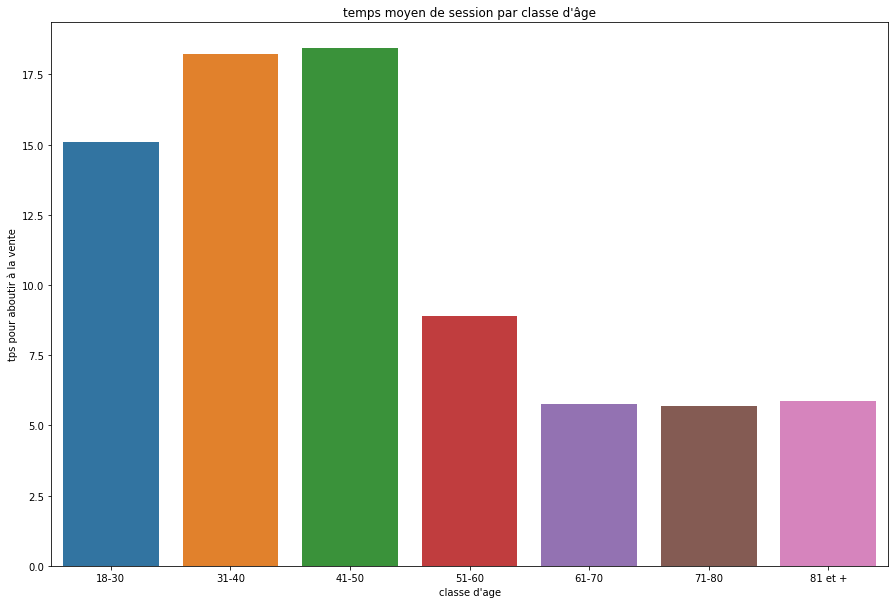

In [42]:
# visualisation du temps sur le site
plt.figure(figsize=(15,10))
sns.barplot(data= df_tps_ss, x=df_tps_ss["classe_age"].sort_values(), y="duree")
plt.xlabel("classe d'age")
plt.ylabel("tps pour aboutir à la vente")
plt.title("temps moyen de session par classe d'âge")
plt.savefig("temps pour aboutir a une vente en fonction age.png", dpi=300, bbox_inches="tight")
plt.show()

les 41-50 sot ceux qui restent le plus longtemps sur le site lors de leur visite

## 8.2 étude des corrélations durée et fréquence/chiffre d'affaire par session

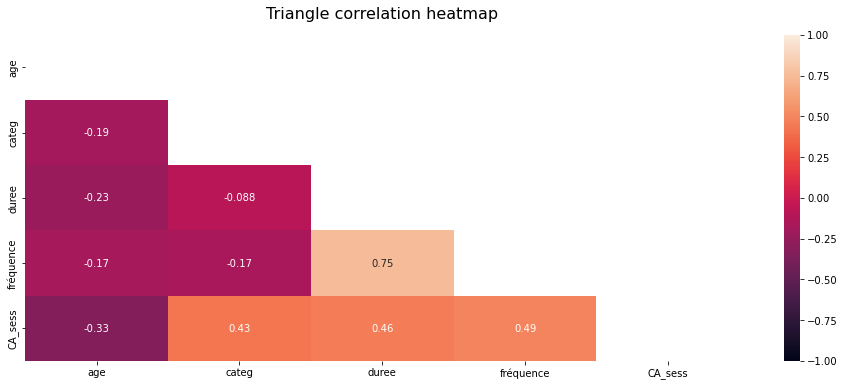

In [43]:
# heatmap de corrélation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_sess_compl.corr(), mask=np.triu(np.ones_like(df_sess_compl.corr(), dtype=bool)), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle correlation heatmap', fontdict={'fontsize':16}, pad=16)
plt.show()

le nombre d'achat et le temps sur le site sont lié  
la valeur chiffre d'affaire de la session est aussi lié au temps passé sur le site

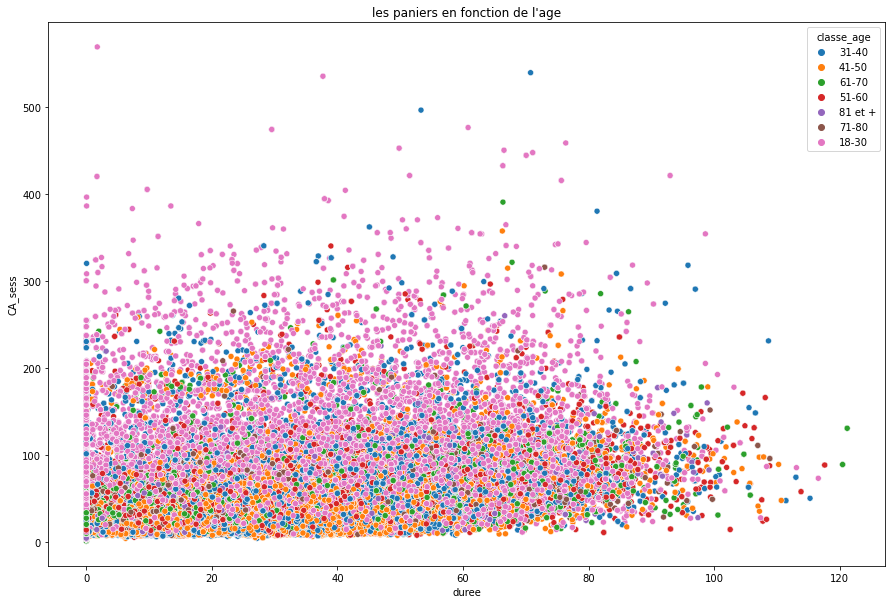

In [44]:
# visualisation de la valeur CA de la session en fonction du temps sur le site répartie par catégorie d'âge
plt.figure(figsize=(15,10))
sns.scatterplot(data= df_sess_compl , x="duree", y="CA_sess", hue="classe_age")
plt.ylabel("CA_sess")
plt.title("les paniers en fonction de l'age")
plt.show()

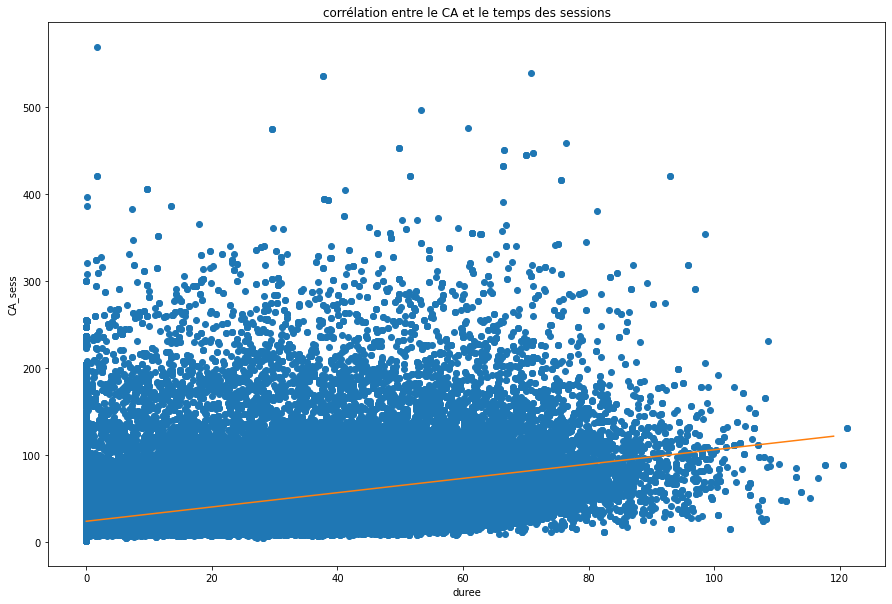

In [45]:
# visualisation de la valeur CA de la session en fonction de la durée sur le site avec courbe de corrélation
Y = df_sess_compl['CA_sess']
X = df_sess_compl[['duree']]
X = X.copy() 
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() 
a,b = result.params['duree'],result.params['intercept']
plt.figure(figsize=(15,10))
plt.plot(df_sess_compl.duree,df_sess_compl.CA_sess, "o")
plt.plot(np.arange(120),[a*x+b for x in np.arange(120)])
plt.xlabel("duree")
plt.ylabel("CA_sess")
plt.title("corrélation entre le CA et le temps des sessions")
plt.savefig("corrélation ca session temps sur le site.png", dpi=300, bbox_inches="tight")
plt.show()

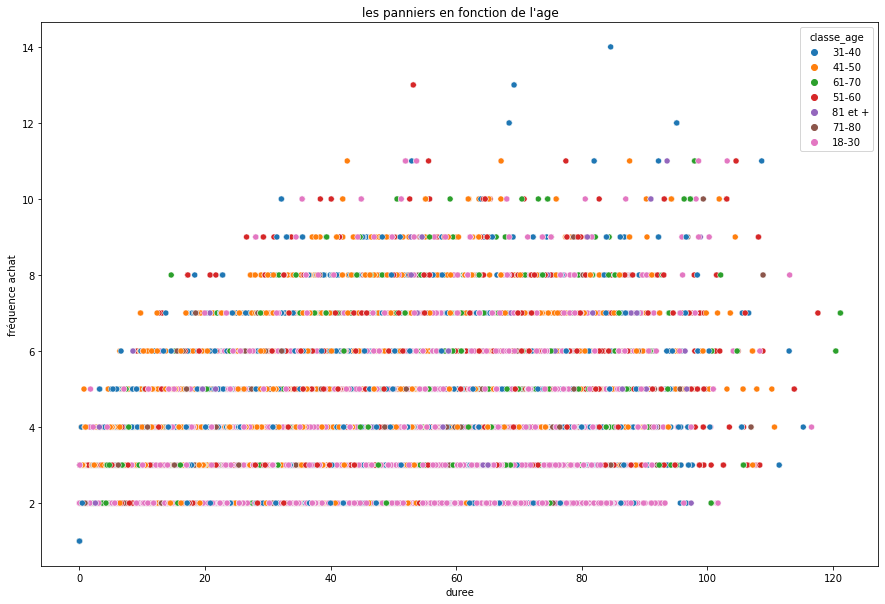

In [46]:
# visualisation durée sur le site et fréquence d'achat par classes d'âge
plt.figure(figsize=(15,10))
sns.scatterplot(data= df_sess_compl , x="duree", y="fréquence", hue="classe_age")
plt.ylabel("fréquence achat")
plt.title("les panniers en fonction de l'age")
plt.show()

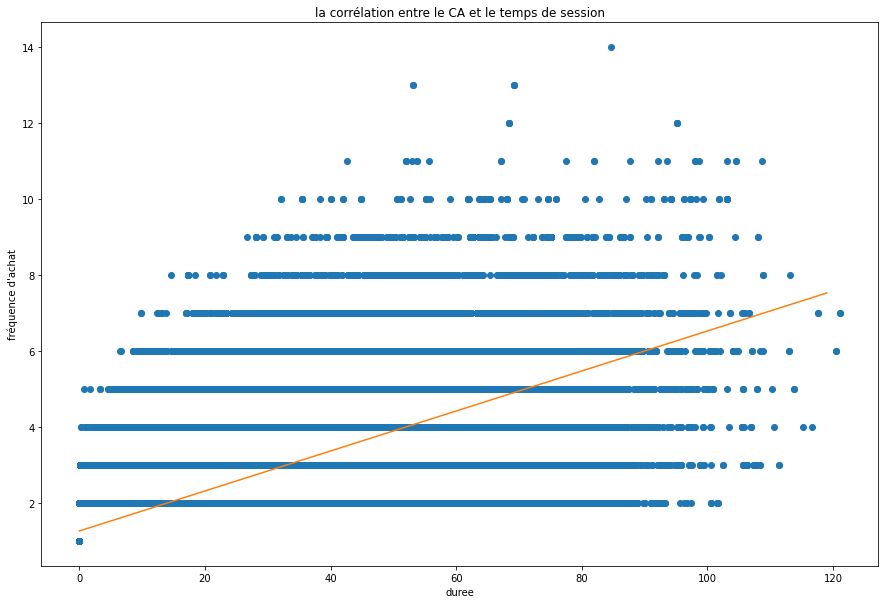

In [47]:
# visualisation durée sur le site et fréquence d'achat avec courbe de corrélation
Y = df_sess_compl['fréquence']
X = df_sess_compl[['duree']]
X = X.copy() 
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() 
a,b = result.params['duree'],result.params['intercept']
plt.figure(figsize=(15,10))
plt.plot(df_sess_compl.duree,df_sess_compl.fréquence, "o")
plt.plot(np.arange(120),[a*x+b for x in np.arange(120)])
plt.xlabel("duree")
plt.ylabel("fréquence d'achat")
plt.title("la corrélation entre le CA et le temps de session")
plt.savefig("corrélation temps fréquence.png", dpi=300, bbox_inches="tight")
plt.show()

# 9 test statistique

## 9.1 observations de la relation entre age et la catégorie

### 9.1.1 ANOVA

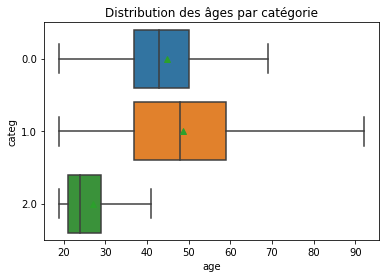

In [48]:
sns.boxplot(data=df_complet, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges par catégorie')
plt.savefig('boxplots_age-categorie.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
sample_df = df_complet.sample(5000)
model = smf.ols("age ~ categ", data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p = anova_table["PR(>F)"][0]
print("ANOVA\np-value :", p, "\nstat (F) :", anova_table["F"][0])
if p > 0.05:
    print("H0: la moyenne des échantillons sont égale.")
else:
    print("H1: une ou plus des moyennes de l'échantillon sont inégales")

ANOVA
p-value : 1.2884141643663963e-17 
stat (F) : 73.55564803738545
H1: une ou plus des moyennes de l'échantillon sont inégales


### 9.1.2 test de shapiro sur les résidus


stats : 0.9638664126396179 
p-value : 1.269281902286613e-33
H0 rejetée : distribution probablement pas normale


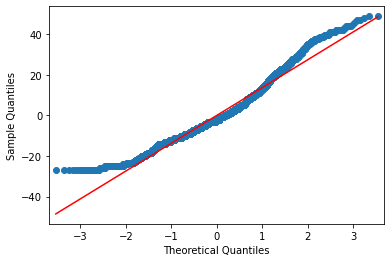

In [59]:
print('\nstats :', stats.shapiro(model.resid)[0],
    '\np-value :', stats.shapiro(model.resid)[1])
if p>.05:
    print('H0 acceptée : distribution normale')
else:
    print('H0 rejetée : distribution probablement pas normale')
qqplot(model.resid, line='s')
plt.show()

### 9.1.3 confirmation des résultats par test chi 2

In [62]:
sample_df = df_sess_compl.sample(1500)
table = pd.crosstab(sample_df["categ"], sample_df["classe_age"], margins=False)
stat, p, dof, expected = stats.chi2_contingency(table)
print("Test de Chi 2 (2 catégorielles)")
print("Stat = %.3f\np-value = %.35f" % (stat, p))
if p > .05:
    print("H0: les deux échantillons sont indépendant")
else:
    print("H1: il y a une dépendance entre les 2 échantillons.")

Test de Chi 2 (2 catégorielles)
Stat = 719.798
p-value = 0.00000000000000000000000000000000000
H1: il y a une dépendance entre les 2 échantillons.


## 9.2 observations de la relation entre age et chiffre d'affaire session

### 9.2.1 vérification de la normalité de la distribution pour déterminer le test à réaliser

In [75]:
# regroupement de CA_sess par age
df_CA_age = df_sess_compl.groupby("age")["CA_sess"].sum().reset_index()
df_CA_age

,age,CA_sess
0,19,609013.69
1,20,178195.78
2,21,184208.31
3,22,178497.70
4,23,165028.62
...,...,...
71,90,5264.67
72,91,5043.19
73,92,2815.45
74,93,4013.87


<AxesSubplot:xlabel='age', ylabel='CA_sess'>

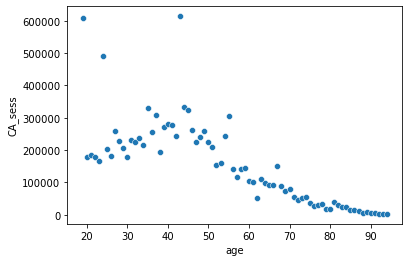

In [76]:
# visualisation CA_sess en fonction de l'age
sns.scatterplot(data= df_CA_age, x="age", y="CA_sess")

In [72]:
# test de normalité de l'age et du ca_sess
print(" test sur l'age", stats.jarque_bera(df_CA_age["age"]))
print(" test sur le CA_sess", stats.jarque_bera(df_CA_age["CA_sess"]))

 test sur l'age Jarque_beraResult(statistic=4.563158988474728, pvalue=0.10212277692273197)
 test sur le CA_sess Jarque_beraResult(statistic=31.65165055534919, pvalue=1.339465124372552e-07)


D'après le test de Jarque Bera sur l'âge et le chiffre d'affaire:  
nous observons que l'âge suit une distribution normale avec un p-value égale à 10,21%  
contrairement au CA qui ne suit probablement pas une distribution normale car la p-value est inférieur à 5%.  
Donc nous allons utiliser un test non paramérique pour étudier la corrélation entre ces deux variables: test Spearman

### 9.2.2 test de spearman

In [73]:
df1 = df_CA_age["age"]
df2 = df_CA_age["CA_sess"]

coef, p = spearmanr(df1, df2)
print("coef de corrélation Spearmans: %.3f" % coef)
# interprétation
alpha = 0.05
if p > alpha:
     print("les échantillons ne sont pas corrélés (nous ne pouvon pas rejeter H0) p=%.3f" % p)
else:
     print("les échantillons sont corrélés (rejet H0) p=%.3f" % p)

coef de corrélation Spearmans: -0.858
les échantillons sont corrélés (rejet H0) p=0.000


In [56]:
df_sess_compl.corr(method="spearman")
df_sess_compl.corr(method="spearman").style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"))

,age,categ,duree,fréquence,CA_sess
age,1.0,-0.12,-0.25,-0.22,-0.34
categ,-0.12,1.0,-0.14,-0.18,0.38
duree,-0.25,-0.14,1.0,0.92,0.61
fréquence,-0.22,-0.18,0.92,1.0,0.65
CA_sess,-0.34,0.38,0.61,0.65,1.0


## 9.3 Test de Chi 2 sur la categ achat et les sex

In [55]:
sample_df = df_complet.sample(1500)
table = pd.crosstab(sample_df["categ"], sample_df["sex"], margins=False)
stat, p, dof, expected = stats.chi2_contingency(table)
print("Test de Chi 2 (2 catégorielles)")
print("Stat = %.3f\np-value = %.35f" % (stat, p))
if p > .05:
    print("H0: les deux échantillons sont indépendant")
else:
    print("H1: il y a une dépendance entre les 2 échantillons.")

Test de Chi 2 (2 catégorielles)
Stat = 1.040
p-value = 0.59445458260177830300818868636270054
H0: les deux échantillons sont indépendant
